In [10]:
import pydicom as dicom
import numpy as np
from pydicom.pixel_data_handlers.util import apply_modality_lut
import os 
from glob import glob 
import re 
import matplotlib.pyplot as plt

In [3]:
path = "../data/dicom/"

In [4]:
high_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "high_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]


In [15]:
file_name = high_metal_folder[1][250]
dicom_img = dicom.dcmread(file_name)
arr = dicom_img.pixel_array
print(max(arr.flatten()))
hu = apply_modality_lut(arr, dicom_img)
clipped_hu = np.clip(hu, -1, 1)

4095


In [18]:
min(arr.flatten()), max(arr.flatten())

(0, 4095)

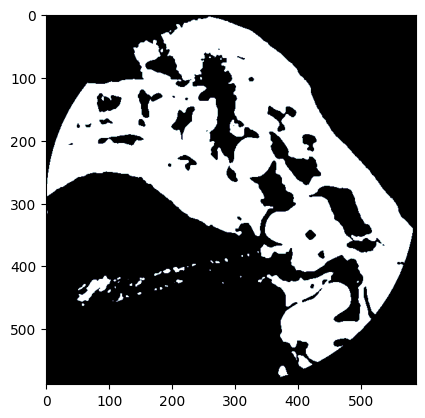

In [16]:
plt.imshow(clipped_hu, cmap=plt.cm.bone)